In [134]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
from librosa.feature import melspectrogram
import matplotlib.pyplot as plt
from io import BytesIO

In [25]:
wav, sr = librosa.load("./data/audio-1k/01W1.mp3")

/home/cian/.local/share/virtualenvs/captcha-demo-iDh-hc03/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


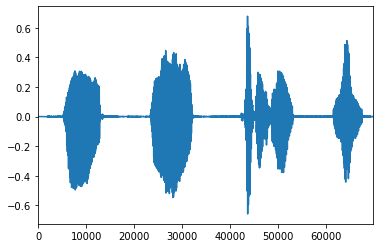

In [26]:
ts = pd.Series(wav)
ts.plot()

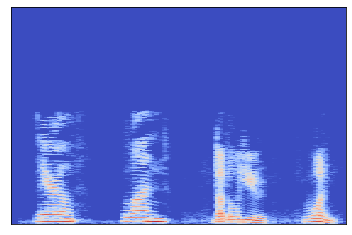

In [27]:
spec = librosa.stft(wav)

librosa.time_stretch(spec)
spec_db = librosa.amplitude_to_db(np.abs(spec))
librosa.display.specshow(spec_db, sr=sr)


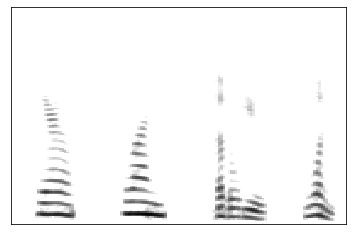

In [149]:
S = librosa.feature.melspectrogram(wav, sr)
log_S = librosa.amplitude_to_db(S)
librosa.display.specshow(log_S, sr=sr, fmin=300, fmax=3400, cmap='gray_r')

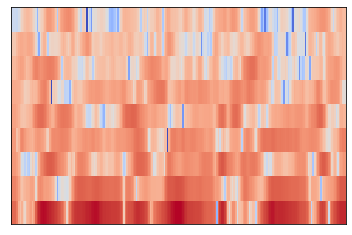

In [41]:
from rasta import rastaplp
rwav = rastaplp(wav)
rwav_s = librosa.amplitude_to_db(rwav)
librosa.display.specshow(rwav_s, sr=sr)

In [44]:
rwav.shape

(9, 216)

/home/cian/.local/share/virtualenvs/captcha-demo-iDh-hc03/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


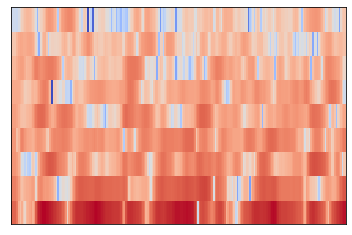

In [45]:
wav1, sr1 = librosa.load("./data/audio-1k/0279.mp3")
rwav1 = rastaplp(wav1)
rwav1_s = librosa.amplitude_to_db(rwav1)
librosa.display.specshow(rwav1_s, sr=sr1)

In [46]:
rwav1.shape

(9, 213)

In [114]:
rwav1

array([[-0.65254131, -0.65254131, -0.65254131, ..., -1.7204189 ,
        -1.87161713, -1.96331698],
       [-0.39520637, -0.39520637, -0.39520637, ..., -0.5881132 ,
        -0.73340452, -0.82632877],
       [-0.25514021, -0.25514021, -0.25514021, ...,  0.12681039,
         0.01310365, -0.07008698],
       ...,
       [-0.10884235, -0.10884235, -0.10884235, ..., -0.11754404,
        -0.06719392, -0.03687635],
       [-0.0680486 , -0.0680486 , -0.0680486 , ..., -0.10129378,
        -0.09344055, -0.08022824],
       [-0.01331935, -0.01331935, -0.01331935, ...,  0.033637  ,
         0.05916009,  0.0718478 ]])

In [123]:
np.pad(rwav1, [(0,0), (0, 87)], mode="edge")

array([[-0.65254131, -0.65254131, -0.65254131, ..., -1.96331698,
        -1.96331698, -1.96331698],
       [-0.39520637, -0.39520637, -0.39520637, ..., -0.82632877,
        -0.82632877, -0.82632877],
       [-0.25514021, -0.25514021, -0.25514021, ..., -0.07008698,
        -0.07008698, -0.07008698],
       ...,
       [-0.10884235, -0.10884235, -0.10884235, ..., -0.03687635,
        -0.03687635, -0.03687635],
       [-0.0680486 , -0.0680486 , -0.0680486 , ..., -0.08022824,
        -0.08022824, -0.08022824],
       [-0.01331935, -0.01331935, -0.01331935, ...,  0.0718478 ,
         0.0718478 ,  0.0718478 ]])

In [124]:
np.expand_dims(rwav1, axis=2)

array([[[-0.65254131],
        [-0.65254131],
        [-0.65254131],
        ...,
        [-1.7204189 ],
        [-1.87161713],
        [-1.96331698]],

       [[-0.39520637],
        [-0.39520637],
        [-0.39520637],
        ...,
        [-0.5881132 ],
        [-0.73340452],
        [-0.82632877]],

       [[-0.25514021],
        [-0.25514021],
        [-0.25514021],
        ...,
        [ 0.12681039],
        [ 0.01310365],
        [-0.07008698]],

       ...,

       [[-0.10884235],
        [-0.10884235],
        [-0.10884235],
        ...,
        [-0.11754404],
        [-0.06719392],
        [-0.03687635]],

       [[-0.0680486 ],
        [-0.0680486 ],
        [-0.0680486 ],
        ...,
        [-0.10129378],
        [-0.09344055],
        [-0.08022824]],

       [[-0.01331935],
        [-0.01331935],
        [-0.01331935],
        ...,
        [ 0.033637  ],
        [ 0.05916009],
        [ 0.0718478 ]]])

In [151]:
from python_speech_features import mfcc

In [155]:
wav1_mfcc = mfcc(wav1)

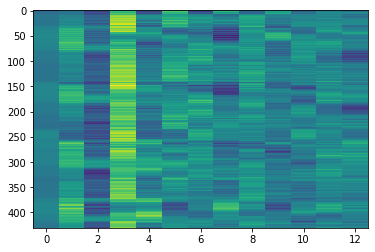

In [161]:
plt.imshow(wav1_mfcc, aspect="auto")

In [162]:
len(wav1)

69061

In [185]:
num_symbols = 4
seconds_per_symbol = 0.5
expected_samples = sr * num_symbols * seconds_per_symbol
expected_samples

44100.0

In [186]:
from librosa.effects import time_stretch
resample_ratio = len(wav1) / expected_samples
resampled = time_stretch(wav1, resample_ratio)
len(resampled)

44100

In [187]:
resampled_mfcc = mfcc(resampled)
resampled_mfcc.shape


(275, 13)

In [192]:
plt.axis('off')
plt.imshow(resampled_mfcc, cmap="gray_r")

In [189]:
import soundfile as sf
sf.write("/home/cian/test.wav", resampled, sr, subtype="PCM_24")

In [246]:
def mfcc_spec(y, sr, target_sr=16000, num_symbols=4, secs_per_symbol=0.5):
    # resample to 16khz to avoid warnings about FFT size
    resampled = librosa.resample(y, sr, target_sr, res_type='fft', fix=True, scale=True)
    # we need to ensure a consistent audio length.
    # defaulting to 2 seconds.
    num_samples = len(resampled)
    print("num_samples: {0}".format(num_samples))
    expected_seconds = secs_per_symbol * num_symbols
    expected_samples = target_sr * expected_seconds
    stretch_ratio = num_samples / expected_samples
    print("expected samples: {0} stretch ratio: {1}".format(expected_samples, stretch_ratio))
    stretched = time_stretch(resampled, stretch_ratio)
    print("samples after stretching: {0}".format(len(stretched)))
    frame_size = 0.025
    nframes = expected_seconds / frame_size
    frame_len = expected_samples / nframes
    fft_size = 2 * frame_len
    print("frames: {0} frame_len: {1} fft size: {2}".format(nframes, frame_len, fft_size))
    # now we can perform MFCC extraction
    cepstra = mfcc(stretched, nfft=int(fft_size))
    print(cepstra.shape)
    return cepstra

num_samples: 50689
expected samples: 32000.0 stretch ratio: 1.58403125
samples after stretching: 32000
frames: 80.0 frame_len: 400.0 fft size: 800.0
(199, 13)
num_samples: 50689
expected samples: 64000 stretch ratio: 0.792015625
samples after stretching: 64000
frames: 160.0 frame_len: 400.0 fft size: 800.0
(399, 13)
num_samples: 50689
expected samples: 128000 stretch ratio: 0.3960078125
samples after stretching: 128000
frames: 320.0 frame_len: 400.0 fft size: 800.0
(799, 13)


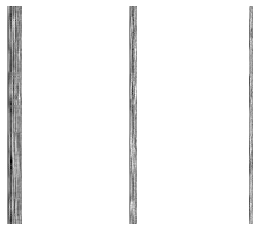

In [247]:
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(mfcc_spec(wav, sr, secs_per_symbol=0.5), cmap="gray_r")
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(mfcc_spec(wav, sr, secs_per_symbol=1), cmap="gray_r")
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(mfcc_spec(wav, sr, secs_per_symbol=2), cmap="gray_r")